In [15]:
import numpy as np
from scipy.signal import convolve2d 
from os import path, getcwd, system, getenv
from astropy.io import fits
from time import perf_counter
import urllib.request
import os

import matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import matplotlib.gridspec as gridspec

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from matplotlib.backends.backend_pdf import PdfPages

import sys,inspect
currentdir = path.dirname(path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = path.dirname(currentdir)
sys.path.append(parentdir)
# from deconv import cube_deconv
# from ppxf_wrap import ppxf_wrap

# import warnings

# if True:
#     print('Set warnings.filterwarnings as "ignore"')
#     print('Warning Message will not be printed')
#     warnings.filterwarnings("ignore")

from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import constants
import pandas as pd

# import plotly.express as px
from astroquery.mast import Observations


from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.nddata.utils import Cutout2D

from astropy.wcs import WCS
import astropy

from urllib.error import HTTPError
from astroquery.skyview import SkyView
import pickle


computer = 1
maindir = "C:/Users/maxri/Desktop/Classes_4-1/Research/fuse"
obn = 80
skydowni ="./images_redOb{}".format(obn); 


In [16]:
#Create Object List/
#Save to Object Tables

catalogdir = "C:/Users/maxri/Desktop/Classes_4-1/Research/data/VI_129_fuse.dat.fits"
catalog = fits.open(catalogdir)

catheader = catalog[0]; catlist = catalog[1];

dflist = pd.DataFrame(catlist.data)



catalog.close()


obs=dflist.query("Class == {} and Avail=='y'".format(obn));

dflist

#Reading Index
indexdir = f"{maindir}/tbls/{obn}index.txt"
indexdir

ipd = pd.read_table(indexdir, header = None)




obsn1 = []
for i in obs.iterrows():
    b = [i[1][1].split()[0],i[1][2], i[1][3]] 
    obsn1.append(b)
    

    
obsn1

s1 = maindir+"/tbls/Objects{}.tbl".format(obn); 

np.savetxt(s1,obsn1,fmt="%s",delimiter = " ")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/tbls/0index.txt'

In [3]:
#Skyview Query by Object name or Coordinate, reads in the from Object table. 
#Image query block

size = 1600

width_val = u.Quantity(size, unit = 'arcsec')
height_val =  u.Quantity(size, unit = 'arcsec')

t3 = []
# if computer == 2:
#     t = pd.read_table("C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/objs2.tbl",header=None)
# if computer == 1:
#     t = pd.read_table("C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/tbls/objs2.tbl",header=None)
    
    
    #Read selected class object table
if computer == 1:
    t2 = pd.read_table(s1,header=None)
    
    

# for i in t.values:
#     t3.append(i[0])


coordsn = [];t4=[]


for i in t2.values:
    b = i[0].split()
    c = SkyCoord(b[1],b[2], unit=u.deg)
    coordsn.append(c)
    t4.append(b[0])
    
coordsn
    

objnamesn = t4; objnames = objnamesn;


obstables2 = []; coords = [];

#pixels initially 300 x 300
#Initial Skyview Query by name

surveys = ['DSS', 'DSS1 Blue', 'DSS1 Red', 'DSS2 Red', 'DSS2 Blue', 'DSS2 IR'] #use surveyindex = 3 Dss2red

surveyindex = 3


for i in range(len(objnamesn)):
        paths = [];
        try:
            paths = SkyView.get_images(position = coordsn[i], 
                       survey=surveys[surveyindex],width = width_val,height = height_val,pixels = [1000,1000])
            hdr = paths[0][0].header
            a = hdr['HISTORY'][33].split()
            cd= [float(a[2]),float(a[3])]
            print(objnamesn[i],surveys[surveyindex])
            c = SkyCoord(cd[0],cd[1], unit=u.deg)
            coords.append(c)
    
        except HTTPError:
            print("No Result for ", objnamesn[i], surveys[surveyindex])
        obstables2.append(paths)
        
        
objnames = objnamesn
        
result = pd.DataFrame(obstables2)

obstables2, result, objnamesn,coords
#objnamesn, coordsn

NGC4631-A DSS2 Red
NGC4631-B DSS2 Red
NGC891-1 DSS2 Red
NGC891-2 DSS2 Red
NGC891-3 DSS2 Red
NGC7714 DSS2 Red
NGC7714 DSS2 Red
NGC7714 DSS2 Red
NGC7714 DSS2 Red
NGC7714 DSS2 Red
NGC5457-POS1 DSS2 Red
NGC5194-POS1 DSS2 Red
NGC5194-POS4 DSS2 Red
NGC5194-POS2 DSS2 Red
NGC5194-POS3 DSS2 Red
NGC5194-POS5 DSS2 Red
NGC5055-POS2 DSS2 Red
NGC5055-POS1 DSS2 Red
NGC4631-I DSS2 Red
NGC4736-POS1 DSS2 Red
NGC4631-A DSS2 Red
NGC224 DSS2 Red
NGC224 DSS2 Red
NGC224 DSS2 Red
NGC224 DSS2 Red
NGC5457-POS2 DSS2 Red
NGC4736-POS2 DSS2 Red
NGC4631-H DSS2 Red
NGC4631-F DSS2 Red
NGC1313 DSS2 Red
NGC7714 DSS2 Red
NGC5055 DSS2 Red
NGC2403 DSS2 Red
NGC5866 DSS2 Red


([[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD3EA8820>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD3E661A0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD455B790>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD3A74DC0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD54863B0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD5AF36A0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD3BB5EA0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD5B4B490>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD58D0AC0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD44CE0B0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD58D29E0>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD3A51B70>]],
  [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002AAD43E72B0>]],
  [[<astropy.io.fits.hdu.

In [4]:
#Skyview Download Images Code Block, to same convention as before
#Create Download directory too

pt = os.path.join(maindir, skydowni[2:])
try:
    os.mkdir(os.path.normpath(pt))
    print("Created images_red directory")
except:
    print("Directory already exists")

result;
coords
for i in range(len(result)):
    a = surveys[surveyindex].split() #Survey
    b = objnames[i].split()
    name = b[0] #+ b[1]     #OBjName
    if i < 9:
        fname = "000{}_{}_{}_{}_{}".format(i+1,coordsn[i].ra.deg,coordsn[i].dec.deg,a[0]+a[1],name)
    else:
        fname = "00{}_{}_{}_{}_{}".format(i+1,coordsn[i].ra.deg,coordsn[i].dec.deg,a[0]+a[1],name)
    #print(fname)
    result[0][i][0].writeto(skydowni+ "/"+fname+".fits", output_verify='exception', overwrite=True, checksum=False)
    
    

Directory already exists


In [5]:
#MAin FUSE DOWNLOAD BLOCK
def set_rcparams_prop(amp=1, fs=22, tickamp=None):
    fs=18
    if tickamp==None:
        tickamp=amp
    tickmajorwidth=2.5*amp
    tickminorwidth=2.5*amp
    axeslw=2.5*amp
    tmjs=6*tickamp
    tmns=tmjs/3.5*2
    plt.rcParams['axes.titlesize']=fs
    plt.rcParams['axes.labelsize']=fs
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    plt.rcParams['axes.linewidth'] = axeslw
    plt.rcParams['xtick.major.width'] = tickmajorwidth
    plt.rcParams['ytick.major.width'] = tickmajorwidth
    plt.rcParams['xtick.minor.width'] = tickminorwidth
    plt.rcParams['ytick.minor.width'] = tickminorwidth
    plt.rcParams['xtick.major.size'] = tmjs
    plt.rcParams['ytick.major.size'] = tmjs
    plt.rcParams['xtick.minor.size'] = tmns
    plt.rcParams['ytick.minor.size'] = tmns

#Download Method
# obs_tables=[]
# for i in range(len(objnames)):
#     print(objnames[i]) #objectname=objname[i] vs coordinates=coordsn[i] Object Name vs Coordinate Query
#     obs_tables.append(Observations.query_criteria(obs_collection='FUSE',coordinates=coordsn[i], radius=".5 deg"))


#Pickle Method obs_tables
pickledir = maindir + "/Pickles/" + "Ob{}".format(obn)
with open(pickledir, 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    obs_tables = pickle.load(f)
    f.close
    
#Pickle Method Product List
pickledir2 = maindir + "/Pickles/" + "pl{}".format(obn)
with open(pickledir2, 'rb') as g:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    pl = pickle.load(g)
    g.close

#Main Fuse Download
fnames=[]


#download files
if computer == 1:
    down_dir=maindir + "/temp"
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes_4-1/Research/fuse/temp'
    
#Download block 2
for i in range(len(obs_tables)):
# for i in [6]:
    otb=obs_tables[i]
    urls=pl[i]['dataURI']
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[i][np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[i][np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
#TO HEREE
    rr=[x.find('00000all3ttag') for x in urls]
    dpl=pl[i][np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
#    needs documentation
    
    exptimes=obs_tables[0]['t_exptime']
#     print(exptimes)
    cond=exptimes>5000
#     print(obs_tables[4][cond])
    

                               dataURI                                
----------------------------------------------------------------------
  mast:FUSE/url/missions/fuse/data/c0570101/c0570101001fesafraw.fit.gz
  mast:FUSE/url/missions/fuse/data/c0570101/c0570101002fesafraw.fit.gz
  mast:FUSE/url/missions/fuse/data/c0570101/c0570101003fesafraw.fit.gz
  mast:FUSE/url/missions/fuse/data/c0570101/c0570101701fesafraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010011attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010011bttagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010012attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010012bttagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010021attagfraw.fit.gz
mast:FUSE/url/missions/fuse/data/c0570101/c05701010021bttagfraw.fit.gz
                                                                   ...
 mast:FUSE/url/pub/fuse/data/p1340201/p13402010062asic4ttagfcal.fit.gz
 mast:

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz with expected size 612829. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140201000\b114020100000all4ttagfcal.fit.gz with expected size 611946. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140301000\b114030100000all4ttagfcal.fit.gz with expected size 605639. [astroquery.query]
target_name
-----------
   NGC891-1
   NGC891-2
   NGC891-3
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/D

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz with expected size 612829. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140201000\b114020100000all4ttagfcal.fit.gz with expected size 611946. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140301000\b114030100000all4ttagfcal.fit.gz with expected size 605639. [astroquery.query]
target_name
-----------
   NGC891-1
   NGC891-2
   NGC891-3
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/D

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz with expected size 612829. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140201000\b114020100000all4ttagfcal.fit.gz with expected size 611946. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140301000\b114030100000all4ttagfcal.fit.gz with expected size 605639. [astroquery.query]
target_name
-----------
   NGC891-1
   NGC891-2
   NGC891-3
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1140101000\b114010100000all4ttagfcal.fit.gz ...
C:/Users/maxri/D

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180501000\b018050100000all2ttagfcal.fit.gz with expected size 398783. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180502000\b018050200000all2ttagfcal.fit.gz with expected size 398571. [astroquery.query]
target_name 
------------
     NGC5461
     NGC5447
     NGC5471
     NGC5471
NGC5457-POS1
NGC5457-POS2
     M-101-D
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180501000\b018050100000all2ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180502000\b018050200000all2ttagfcal.fit.gz ...
                         

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060101000\b106010100000all4ttagfcal.fit.gz with expected size 394345. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060201000\b106020100000all4ttagfcal.fit.gz with expected size 606920. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060301000\b106030100000all4ttagfcal.fit.gz with expected size 603788. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060401000\b106040100000all4ttagfcal.fit.gz with expected size 393155. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060501000\b106050100000all4ttagfcal.fit.gz with expected size 608767. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060101000\b106010100000all4ttagfcal.fit.gz with expected size 394345. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060201000\b106020100000all4ttagfcal.fit.gz with expected size 606920. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060301000\b106030100000all4ttagfcal.fit.gz with expected size 603788. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060401000\b106040100000all4ttagfcal.fit.gz with expected size 393155. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060501000\b106050100000all4ttagfcal.fit.gz with expected size 608767. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060101000\b106010100000all4ttagfcal.fit.gz with expected size 394345. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060201000\b106020100000all4ttagfcal.fit.gz with expected size 606920. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060301000\b106030100000all4ttagfcal.fit.gz with expected size 603788. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060401000\b106040100000all4ttagfcal.fit.gz with expected size 393155. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060501000\b106050100000all4ttagfcal.fit.gz with expected size 608767. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060101000\b106010100000all4ttagfcal.fit.gz with expected size 394345. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060201000\b106020100000all4ttagfcal.fit.gz with expected size 606920. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060301000\b106030100000all4ttagfcal.fit.gz with expected size 603788. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060401000\b106040100000all4ttagfcal.fit.gz with expected size 393155. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060501000\b106050100000all4ttagfcal.fit.gz with expected size 608767. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060101000\b106010100000all4ttagfcal.fit.gz with expected size 394345. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060201000\b106020100000all4ttagfcal.fit.gz with expected size 606920. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060301000\b106030100000all4ttagfcal.fit.gz with expected size 603788. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060401000\b106040100000all4ttagfcal.fit.gz with expected size 393155. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060501000\b106050100000all4ttagfcal.fit.gz with expected size 608767. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz with expected size 593130. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060901000\b106090100000all4ttagfcal.fit.gz with expected size 595045. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\e0950101000\e095010100000all4ttagfcal.fit.gz with expected size 617105. [astroquery.query]
target_name 
------------
     NGC5055
NGC5055-POS1
NGC5055-POS2
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz ...
C:/Users/ma

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz with expected size 593130. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060901000\b106090100000all4ttagfcal.fit.gz with expected size 595045. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\e0950101000\e095010100000all4ttagfcal.fit.gz with expected size 617105. [astroquery.query]
target_name 
------------
     NGC5055
NGC5055-POS1
NGC5055-POS2
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz ...
C:/Users/ma

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061001000\b106100100000all4ttagfcal.fit.gz with expected size 606966. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061101000\b106110100000all4ttagfcal.fit.gz with expected size 608845. [astroquery.query]
target_name 
------------
NGC4736-POS2
NGC4736-POS1
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061001000\b106100100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061101000\b106110100000all4ttagfcal.fit.gz ...
                               dataURI                               
--------------------

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280101000\c128010100000all4ttagfcal.fit.gz with expected size 616755. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280102000\c128010200000all4ttagfcal.fit.gz with expected size 616975. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280103000\c128010300000all4ttagfcal.fit.gz with expected size 616196. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280104000\c128010400000all4ttagfcal.fit.gz with expected size 615275. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280301000\c128030100000all4ttagfcal.fit.gz with expected size 609929. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280101000\c128010100000all4ttagfcal.fit.gz with expected size 616755. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280102000\c128010200000all4ttagfcal.fit.gz with expected size 616975. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280103000\c128010300000all4ttagfcal.fit.gz with expected size 616196. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280104000\c128010400000all4ttagfcal.fit.gz with expected size 615275. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280301000\c128030100000all4ttagfcal.fit.gz with expected size 609929. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280101000\c128010100000all4ttagfcal.fit.gz with expected size 616755. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280102000\c128010200000all4ttagfcal.fit.gz with expected size 616975. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280103000\c128010300000all4ttagfcal.fit.gz with expected size 616196. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280104000\c128010400000all4ttagfcal.fit.gz with expected size 615275. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280301000\c128030100000all4ttagfcal.fit.gz with expected size 609929. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280101000\c128010100000all4ttagfcal.fit.gz with expected size 616755. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280102000\c128010200000all4ttagfcal.fit.gz with expected size 616975. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280103000\c128010300000all4ttagfcal.fit.gz with expected size 616196. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280104000\c128010400000all4ttagfcal.fit.gz with expected size 615275. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1280301000\c128030100000all4ttagfcal.fit.gz with expected size 609929. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180501000\b018050100000all2ttagfcal.fit.gz with expected size 398783. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180502000\b018050200000all2ttagfcal.fit.gz with expected size 398571. [astroquery.query]
target_name 
------------
     NGC5461
     NGC5447
     NGC5471
     NGC5471
NGC5457-POS1
NGC5457-POS2
     M-101-D
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180501000\b018050100000all2ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b0180502000\b018050200000all2ttagfcal.fit.gz ...
                         

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061001000\b106100100000all4ttagfcal.fit.gz with expected size 606966. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061101000\b106110100000all4ttagfcal.fit.gz with expected size 608845. [astroquery.query]
target_name 
------------
NGC4736-POS2
NGC4736-POS1
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061001000\b106100100000all4ttagfcal.fit.gz ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1061101000\b106110100000all4ttagfcal.fit.gz ...
                               dataURI                               
--------------------

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570101000\c057010100000all4ttagfcal.fit.gz with expected size 590812. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570201000\c057020100000all4ttagfcal.fit.gz with expected size 606739. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570202000\c057020200000all4ttagfcal.fit.gz with expected size 617921. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570301000\c057030100000all4ttagfcal.fit.gz with expected size 608883. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0570401000\c057040100000all4ttagfcal.fit.gz with expected size 602786. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d9110301000\d911030100000all4ttagfcal.fit.gz with expected size 616378. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d9110401000\d911040100000all4ttagfcal.fit.gz with expected size 619826. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\u1063201000\u106320100000all4ttagfcal.fit.gz with expected size 591970. [astroquery.query]
target_name
-----------
    NGC1313
 Q0321-6657
 Q0321-6657
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\d9110301000\d911030100000all4ttagfcal.fit.gz ...
C:/Users/maxri/D

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370201000\c037020100000all2ttagfcal.fit.gz with expected size 615339. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370202000\c037020200000all2ttagfcal.fit.gz with expected size 606994. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370203000\c037020300000all2ttagfcal.fit.gz with expected size 578854. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370204000\c037020400000all2ttagfcal.fit.gz with expected size 613577. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c0370205000\c037020500000all2ttagfcal.fit.gz with expected size 601529. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz with expected size 593130. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060901000\b106090100000all4ttagfcal.fit.gz with expected size 595045. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\e0950101000\e095010100000all4ttagfcal.fit.gz with expected size 617105. [astroquery.query]
target_name 
------------
     NGC5055
NGC5055-POS1
NGC5055-POS2
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\b1060801000\b106080100000all4ttagfcal.fit.gz ...
C:/Users/ma

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9180202000\f918020200000all4ttagfcal.fit.gz with expected size 612297. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9180302000\f918030200000all4ttagfcal.fit.gz with expected size 614533. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9180402000\f918040200000all4ttagfcal.fit.gz with expected size 611605. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9180501000\f918050100000all4ttagfcal.fit.gz with expected size 612288. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9180601000\f918060100000all4ttagfcal.fit.gz with expected size 591262. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Resear

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9191601000\f919160100000all4ttagfcal.fit.gz with expected size 581883. [astroquery.query]
target_name
-----------
    NGC5866
                                                     Local Path                                                      ...
-------------------------------------------------------------------------------------------------------------------- ...
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\f9191601000\f919160100000all4ttagfcal.fit.gz ...
                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/f9191601/f9191601001fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f9191601/f9191601002fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f9191601/f9191601003fesbfraw.fit.gz
      mast:FUSE/url/pub/fuse/data/f9191601/f9191601004fesbfraw.f

In [6]:
dfi = pd.DataFrame(obs_tables)
dfi[0]

0     [[spectrum, 2, FUSE, c0570201000, NGC4631-F, 1...
1     [[spectrum, 2, FUSE, c0570201000, NGC4631-F, 1...
2     [[spectrum, 2, FUSE, b1140101000, NGC891-1, 35...
3     [[spectrum, 2, FUSE, b1140101000, NGC891-1, 35...
4     [[spectrum, 2, FUSE, b1140101000, NGC891-1, 35...
5     [[spectrum, 2, FUSE, a0230404000, NGC7714, 354...
6     [[spectrum, 2, FUSE, a0230404000, NGC7714, 354...
7     [[spectrum, 2, FUSE, a0230404000, NGC7714, 354...
8     [[spectrum, 2, FUSE, a0230404000, NGC7714, 354...
9     [[spectrum, 2, FUSE, a0230404000, NGC7714, 354...
10    [[spectrum, 2, FUSE, a0860505000, NGC5461, 210...
11    [[spectrum, 2, FUSE, b1060101000, NGC5194-POS1...
12    [[spectrum, 2, FUSE, b1060101000, NGC5194-POS1...
13    [[spectrum, 2, FUSE, b1060101000, NGC5194-POS1...
14    [[spectrum, 2, FUSE, b1060101000, NGC5194-POS1...
15    [[spectrum, 2, FUSE, b1060101000, NGC5194-POS1...
16    [[spectrum, 2, FUSE, e0950101000, NGC5055, 198...
17    [[spectrum, 2, FUSE, e0950101000, NGC5055,

In [7]:
# Pointings download/Creating organised Data Frames
# Slowest Block currently
# Not sure if some parts could be removed.

if computer == 1:
    down_dir=maindir + '/temp/'
if computer == 2:
    down_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/temp/'
    

df=[];

# for i in range(1):

for i in range(len(obs_tables)):
    otb=obs_tables[i]
    urls=pl[i]['dataURI']
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[i][np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df.append(sri)
        
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[i][np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df.append(sri)

        
df = pd.DataFrame(df)    

# hdr        
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(manifest)

LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS
LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS
LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS
LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS
LWRS
LWRS
LWRS
MDRS
MDRS
MDRS
MDRS
MDRS
MDRS
LWRS
LWRS
LWRS
LWRS
LWRS
MDRS
MDRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
MDRS
MDRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
LWRS
MDRS
MDRS


In [8]:
df

objname       targname          ra        dec          pa aperture  \
0    NGC4631-A      NGC4631-A  190.536667  32.576667  215.875488     LWRS   
1    NGC4631-A      NGC4631-F  190.575000  32.563333  328.041870     LWRS   
2    NGC4631-A      NGC4631-F  190.575000  32.563333  290.825684     LWRS   
3    NGC4631-A      NGC4631-H  190.483333  32.553333  328.938538     LWRS   
4    NGC4631-A      NGC4631-I  190.541667  32.551667  216.426193     LWRS   
..         ...            ...         ...        ...         ...      ...   
210    NGC2403  NGC2403-HK270  114.217417  65.612972  299.802582     LWRS   
211    NGC2403  NGC2403-HK128  114.278042  65.610583  254.260010     LWRS   
212    NGC2403  NGC2403-HK128  114.278042  65.610583  227.357056     LWRS   
213    NGC2403        NGC2403  114.214167  65.602500  290.237915     LWRS   
214    NGC5866        NGC5866  226.622917  55.763333  292.219849     LWRS   

    programid  exptime obsmode  \
0        C057   7153.0    TTAG   
1        C057  16500.0    TTAG   
2        C057  27762.0    TTAG   
3        C057  22965.0    TTAG   
4        C057   9407.0    TTAG   
..        ...      ...     ...   
210      F918  30420.0    TTAG   
211      F918   1394.0    TTAG   
212      F918  16380.0    TTAG   
213      F919   6692.0    TTAG   
214      F919   2616.0    TTAG   

                                                  fdir  
0    C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
1    C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
2    C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
3    C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
4    C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
..                                                 ...  
210  C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
211  C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
212  C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
213  C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  
214  C:/Users/maxri/Desktop/Classes 4-1/Research/fu...  

[215 rows x 10 columns]

In [9]:
#Max & Mean exposure calc

tcut=5000
tcut=2000
ndf=df[df['exptime']>tcut]

df2=pd.DataFrame()


for i in range(len(objnames)):
    print(objnames[i])
    adf=ndf[ndf['objname']==objnames[i]]
    adf.index=np.arange(len(adf))
    sri=pd.Series({
        'objname':objnames[i],
        'ra':adf.loc[0,'ra'],
        'dec':adf.loc[0,'dec'],
        'npt':len(adf),
        'maxexp':np.max(adf.loc[:,'exptime'].values),
        'meanexp':np.mean(adf.loc[:,'exptime'].values),
    })
    df2=df2.append(sri, ignore_index=True)
df2


# Table: 
# Galaxy, Program ID, N pointings (exp >5000s), RA, DEC, Max Exp, Mean Exp
# *note on aperture
# *RA DEC unit check



NGC4631-A
NGC4631-B
NGC891-1
NGC891-2
NGC891-3
NGC7714
NGC7714
NGC7714
NGC7714
NGC7714
NGC5457-POS1
NGC5194-POS1
NGC5194-POS4
NGC5194-POS2
NGC5194-POS3
NGC5194-POS5
NGC5055-POS2
NGC5055-POS1
NGC4631-I
NGC4736-POS1
NGC4631-A
NGC224
NGC224
NGC224
NGC224
NGC5457-POS2
NGC4736-POS2
NGC4631-H
NGC4631-F
NGC1313
NGC7714
NGC5055
NGC2403
NGC5866


C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\760775882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ip

objname          ra        dec  npt   maxexp       meanexp
0      NGC4631-A  190.536667  32.576667   14  27762.0  17362.857143
1      NGC4631-B  190.536667  32.576667    7  27762.0  17362.857143
2       NGC891-1   35.620833  42.353333    3  31609.0  27219.000000
3       NGC891-2   35.620833  42.353333    3  31609.0  27219.000000
4       NGC891-3   35.620833  42.353333    3  31609.0  27219.000000
5        NGC7714  354.058750   2.155167   48  51926.0  15674.250000
6        NGC7714  354.058750   2.155167   48  51926.0  15674.250000
7        NGC7714  354.058750   2.155167   48  51926.0  15674.250000
8        NGC7714  354.058750   2.155167   48  51926.0  15674.250000
9        NGC7714  354.058750   2.155167   48  51926.0  15674.250000
10  NGC5457-POS1  210.922083  54.318056    7  33702.0  13514.857143
11  NGC5194-POS1  202.468125  47.195500    8  41784.0  17893.125000
12  NGC5194-POS4  202.468125  47.195500    8  41784.0  17893.125000
13  NGC5194-POS2  202.468125  47.195500    8  41784.0  17893.125000
14  NGC5194-POS3  202.468125  47.195500    8  41784.0  17893.125000
15  NGC5194-POS5  202.468125  47.195500    8  41784.0  17893.125000
16  NGC5055-POS2  198.965833  42.056667    3  22997.0  12778.333333
17  NGC5055-POS1  198.965833  42.056667    3  22997.0  12778.333333
18     NGC4631-I  190.536667  32.576667    7  27762.0  17362.857143
19  NGC4736-POS1  192.732083  41.140000    2  19038.0  14880.500000
20     NGC4631-A  190.536667  32.576667   14  27762.0  17362.857143
21        NGC224   10.674458  40.865889   32  33832.0  21427.375000
22        NGC224   10.674458  40.865889   32  33832.0  21427.375000
23        NGC224   10.674458  40.865889   32  33832.0  21427.375000
24        NGC224   10.674458  40.865889   32  33832.0  21427.375000
25  NGC5457-POS2  210.922083  54.318056    7  33702.0  13514.857143
26  NGC4736-POS2  192.732083  41.140000    2  19038.0  14880.500000
27     NGC4631-H  190.536667  32.576667    7  27762.0  17362.857143
28     NGC4631-F  190.536667  32.576667    7  27762.0  17362.857143
29       NGC1313   49.565833 -66.497861    3  15801.0  12543.333333
30       NGC7714  354.058750   2.155167   48  51926.0  15674.250000
31       NGC5055  198.965833  42.056667    3  22997.0  12778.333333
32       NGC2403  114.083625  65.618583    6  30420.0  18487.666667
33       NGC5866  226.622917  55.763333    1   2616.0   2616.000000

In [12]:
#Setup functions for plots, roudnings and rotating


idex = []
for j2 in range(len(objnames)):
    if ipd[0][j2] == 1:
        idex.append(j2)
        

def fstr(x):
    return x

def ff6(x):
    return '%.6f' % x


def ff4(x):
    return '%.4f' % x

def ff1(x):
    return '%.1f' % x

def ff2(x):
    return '%.2f' % x

def fint(x):
    return '%i' % x

def detection_check(x):
    if x>3:
        return 'Y'
    else:
        return 'N'

    
def rec_rotate(cx, cy, wx, wy, ang_deg): #angle: clocowise rot from 12h
    ang_rad=np.radians(ang_deg)
    wd=(wx**2+wy**2)**0.5
    ang_diagonal=np.arctan(wy/wx)
    ang_new=ang_diagonal+ang_rad
    rx=cx-wd/2*np.cos(ang_new)
    ry=cy-wd/2*np.sin(ang_new)
    return rx, ry
    
df2['randec']=df2['ra'].apply(ff4)+', '+df2['dec'].apply(ff4)
df2['totalexp']=df2['meanexp']*df2['npt']

# coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.hourangle, u.deg))
coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.deg, u.deg))
df2['l']=coords.galactic.l.degree
df2['b']=coords.galactic.b.degree
# df2['rvel']=[269,850,308,500,133,465,241,-39,841,259,1127,757,976,470,610,528] #Radial Velocities
rvel = [2790,3400,-12.2,1647.9,4925,-42.5, -6.2,-101.1,850.0,-106.5,8.9,200,-46.6,200,-4.3,42.1]
rvel = np.repeat(rvel,math.ceil(len(idex))/16 + 1,axis=0)
rvel = rvel[0:len(objnames)]
df2['rvel']=rvel #Test Radial Velocities
#df2['rvel']=[269]

df2['lnb']=df2['l'].apply(ff4)+', '+df2['b'].apply(ff4)

df2['owave']=1031.9*(1+df2['rvel']/299790)

# fmts=[fstr, ff4, ff4, fint, fint, fint]
# fmts=[fstr, ff4, ff4, fint, fint, fint,ff1]
fmts=[fstr, fstr, fint, fint, fint,ff1]
# fmts=[fstr, fstr, fint, fint, fint, fint]
# ridx1=[8,9,3,4,5,6,7,0,1,2]
latex_text=df2.to_latex(index=False, header=False,
                        formatters=fmts,
#              columns=['objname','ra','dec','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp','owave'])
             columns=['objname','lnb','npt','maxexp','totalexp','owave'])
#              columns=['objname','ra','dec','npt','maxexp','meanexp'])
print(latex_text)

print('\hline')
print(' & & & '+fint(np.sum(df2['npt']))+' & &  '+fint(np.sum(df2['npt']*df2['meanexp'])))

# df2.to_csv('adap_2022_targets.csv')

\begin{tabular}{llrrrr}
\toprule
   NGC4631-A &  142.6550, 84.1916 & 14 & 27762 & 243079 & 1041.5 \\
   NGC4631-B &  142.6550, 84.1916 &  7 & 27762 & 121539 & 1041.5 \\
    NGC891-1 & 140.3686, -17.4149 &  3 & 31609 &  81657 & 1041.5 \\
    NGC891-2 & 140.3686, -17.4149 &  3 & 31609 &  81657 & 1043.6 \\
    NGC891-3 & 140.3686, -17.4149 &  3 & 31609 &  81657 & 1043.6 \\
     NGC7714 &  88.2157, -55.5641 & 48 & 51926 & 752364 & 1043.6 \\
     NGC7714 &  88.2157, -55.5641 & 48 & 51926 & 752364 & 1031.9 \\
     NGC7714 &  88.2157, -55.5641 & 48 & 51926 & 752364 & 1031.9 \\
     NGC7714 &  88.2157, -55.5641 & 48 & 51926 & 752364 & 1031.9 \\
     NGC7714 &  88.2157, -55.5641 & 48 & 51926 & 752364 & 1037.6 \\
NGC5457-POS1 &  101.8876, 59.7590 &  7 & 33702 &  94604 & 1037.6 \\
NGC5194-POS1 &  104.8543, 68.5609 &  8 & 41784 & 143145 & 1037.6 \\
NGC5194-POS4 &  104.8543, 68.5609 &  8 & 41784 & 143145 & 1048.9 \\
NGC5194-POS2 &  104.8543, 68.5609 &  8 & 41784 & 143145 & 1048.9 \\
NGC5194-POS3 & 

C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\2381330086.py:68: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_text=df2.to_latex(index=False, header=False,


In [13]:
#Reading in downloaded fits and labeling
if computer == 1:
    file_dir=maindir +'/images_red'      #manual
    file_dir = maindir +  skydowni[1:]     #Skyview
if computer == 2:
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_red'      #manual
    file_dir = 'C:/Users/maxri/OneDrive/Desktop/Classes 4-1/Research/fuse/images_redTEST'  #Skyview
    
file_path=np.array(glob.glob(file_dir+'**/*fits'))
file_path[0].split('_')
# file_path[0].split('/')

fdf=pd.DataFrame()
for i in range(len(file_path)):
    fp=file_path[i]
    print(fp)
    sri=pd.Series({'ra':fp.split('_')[2],
                   'dec':fp.split('_')[3],
                   'file_path':file_dir+'/'+fp.split('/')[-1],
                   'filename':fp.split('/')[-1],
                  })
    fdf=fdf.append(sri, ignore_index=True)
    
    
print(fdf)

print(fdf.filename[0])
print(fdf.file_path[0])

fdf.file_path[0]


C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0001_190.537_32.5767_DSS2Red_NGC4631-A.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0002_190.537_32.56_DSS2Red_NGC4631-B.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0003_35.6208_42.3533_DSS2Red_NGC891-1.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0004_35.6667_42.3767_DSS2Red_NGC891-2.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0005_35.6867_42.37_DSS2Red_NGC891-3.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0006_354.059_2.1553_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0007_354.059_2.1553_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0008_354.059_2.1553_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0009_354.059_2.1553_DSS2Red_NGC7714.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fus

C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_19204\1061527283.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Tem

'C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_redOb80/fuse\\images_redOb80\\0001_190.537_32.5767_DSS2Red_NGC4631-A.fits'

0
NGC4631-A Index  0
0.0
number of matched DF 6
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0001_190.537_32.5767_DSS2Red_NGC4631-A.fits
0.00034643877683038227 0.0012761097343272354 Offsets
190.53673628775536 32.576922221946866 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 190.537  32.5767  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (190.53673629, 32.57692222)>
npt 14
NGC4631-B Index  1
0.0
number of matched DF 6
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0001_190.537_32.5767_DSS2Red_NGC4631-A.fits
0.00034643877683038227 0.0012761097343272354 Offsets
190.53673628775536 32.576922221946866 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 190.537  32.5767  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CD

C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0012_202.468_47.1955_DSS2Red_NGC5194-POS1.fits
-0.002260198697854321 0.001111108784606074 Offsets
202.46767296026042 47.195722221756924 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 202.468  47.1955  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (202.46767296, 47.19572222)>
npt 8
1
NGC5055-POS2 Index  16
0.0
number of matched DF 3
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0017_198.943_42.0056_DSS2Red_NGC5055-POS2.fits
-0.1156602842979737 -0.25422389082933705 Offsets
198.9427009431404 42.00582222183413 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 198.943  42.0056  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444

MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
MDRS!!!
NGC5055 Index  31
0.0
number of matched DF 3
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0017_198.943_42.0056_DSS2Red_NGC5055-POS2.fits
-0.1156602842979737 -0.25422389082933705 Offsets
198.9427009431404 42.00582222183413 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 198.943  42.0056  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004444444444444444  0.0004444444444444444  
NAXIS : 1000  1000 <SkyCoord (ICRS): (ra, dec) in deg
    (198.94270094, 42.00582222)>
npt 3
2
NGC2403 Index  32
0.0
number of matched DF 1
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_redOb80\0033_114.214_65.6025_DSS2Red_NGC2403.fits
0.6491850566805368 -0.0793038936395618 Offsets
114.2134620113361 65.60272222127209 1Coord
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 114.214  65.6025  
CRPIX : 500.5  500.5  
PC1_1 

<Figure size 2000x3000 with 0 Axes>

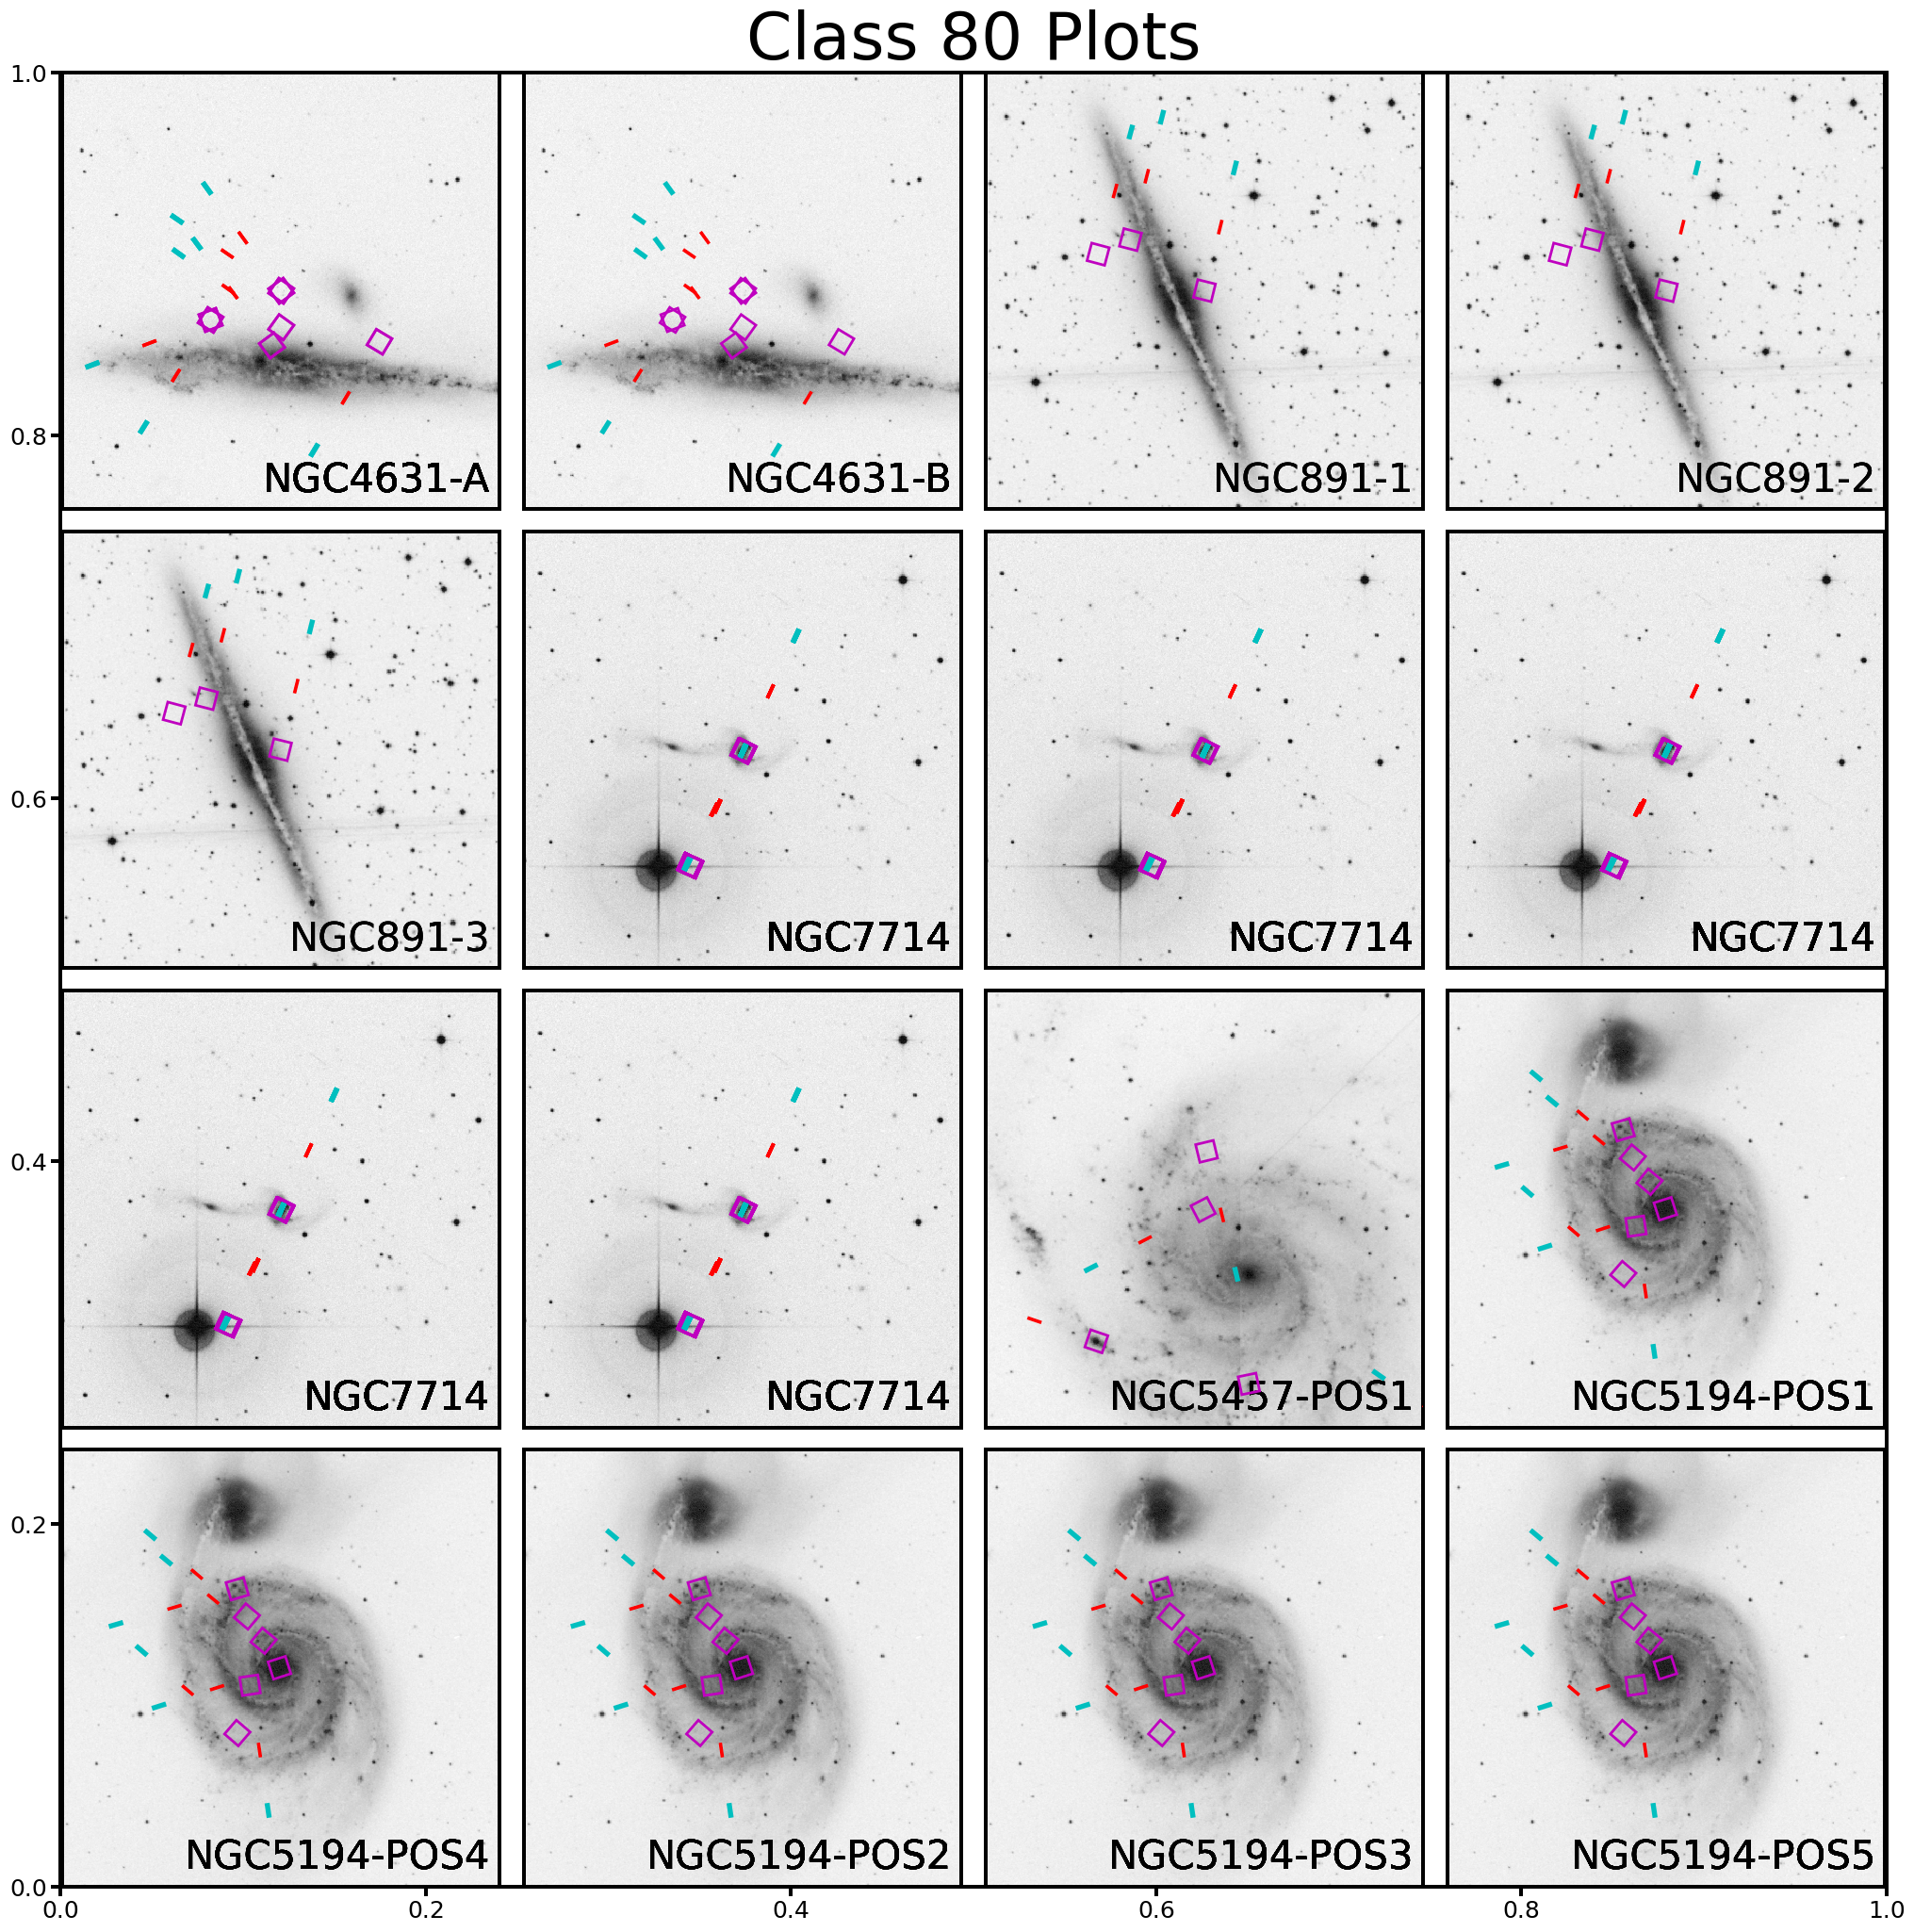

<Figure size 2000x3000 with 0 Axes>

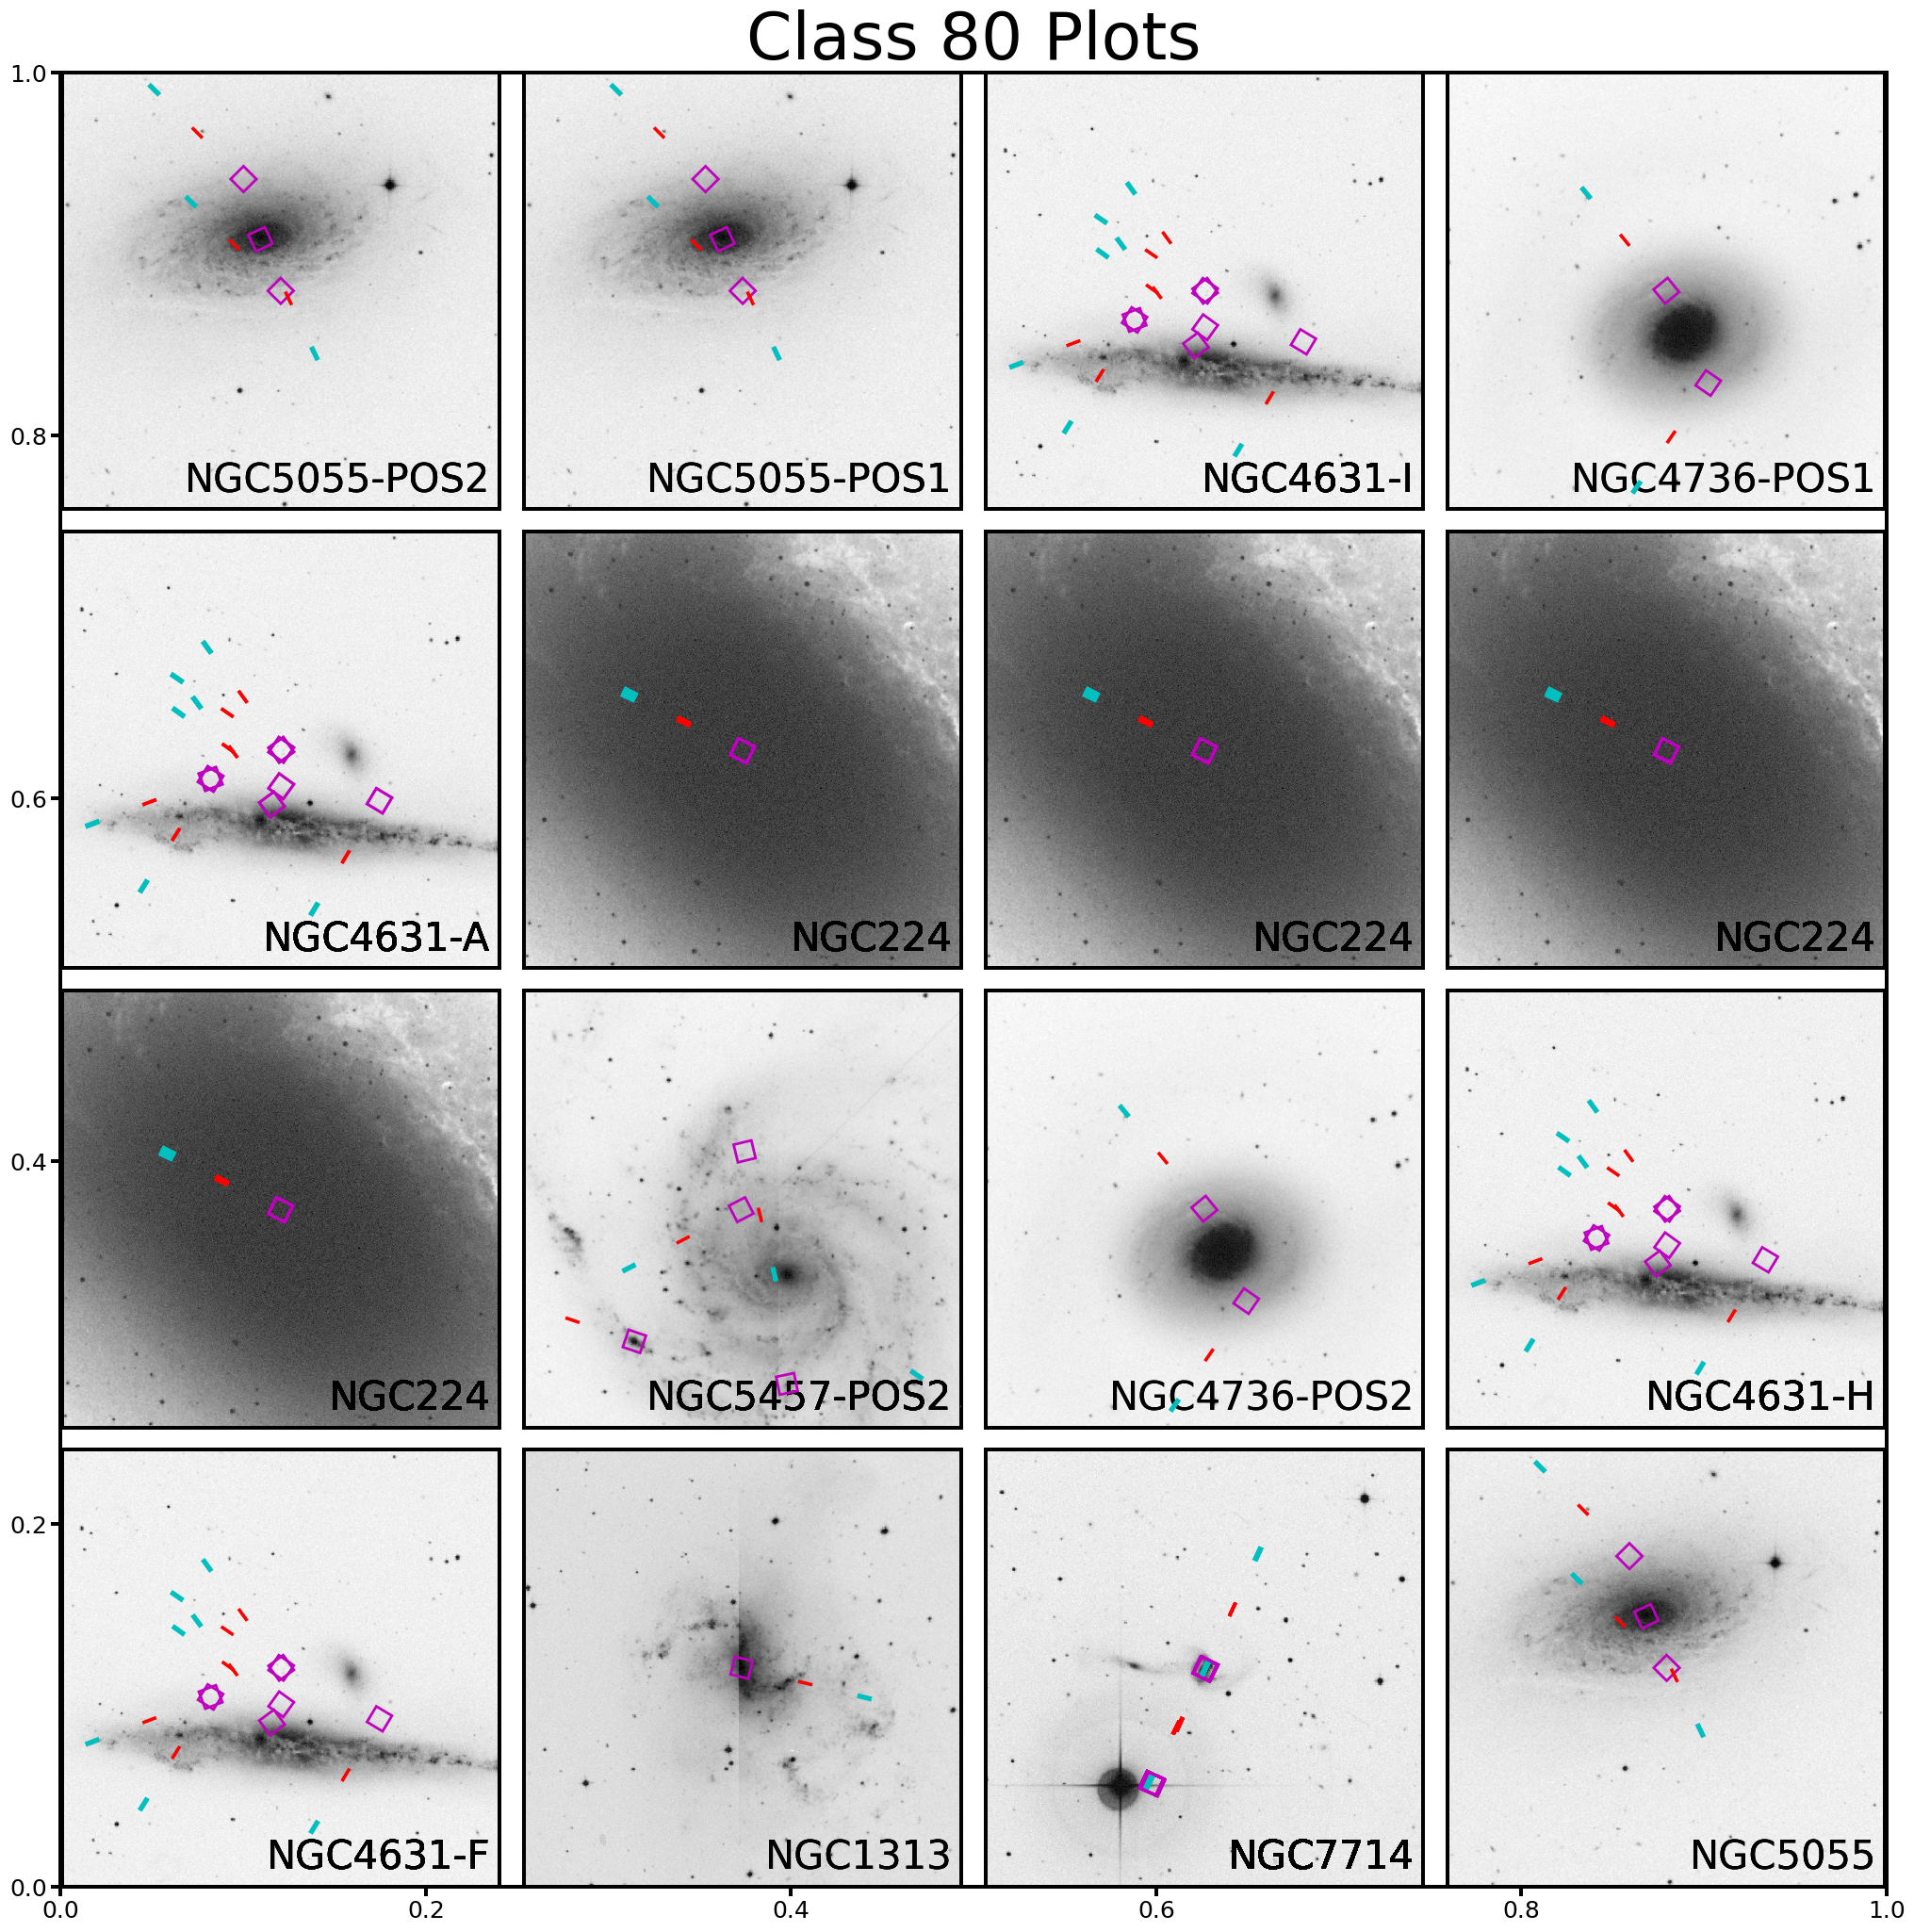

<Figure size 2000x3000 with 0 Axes>

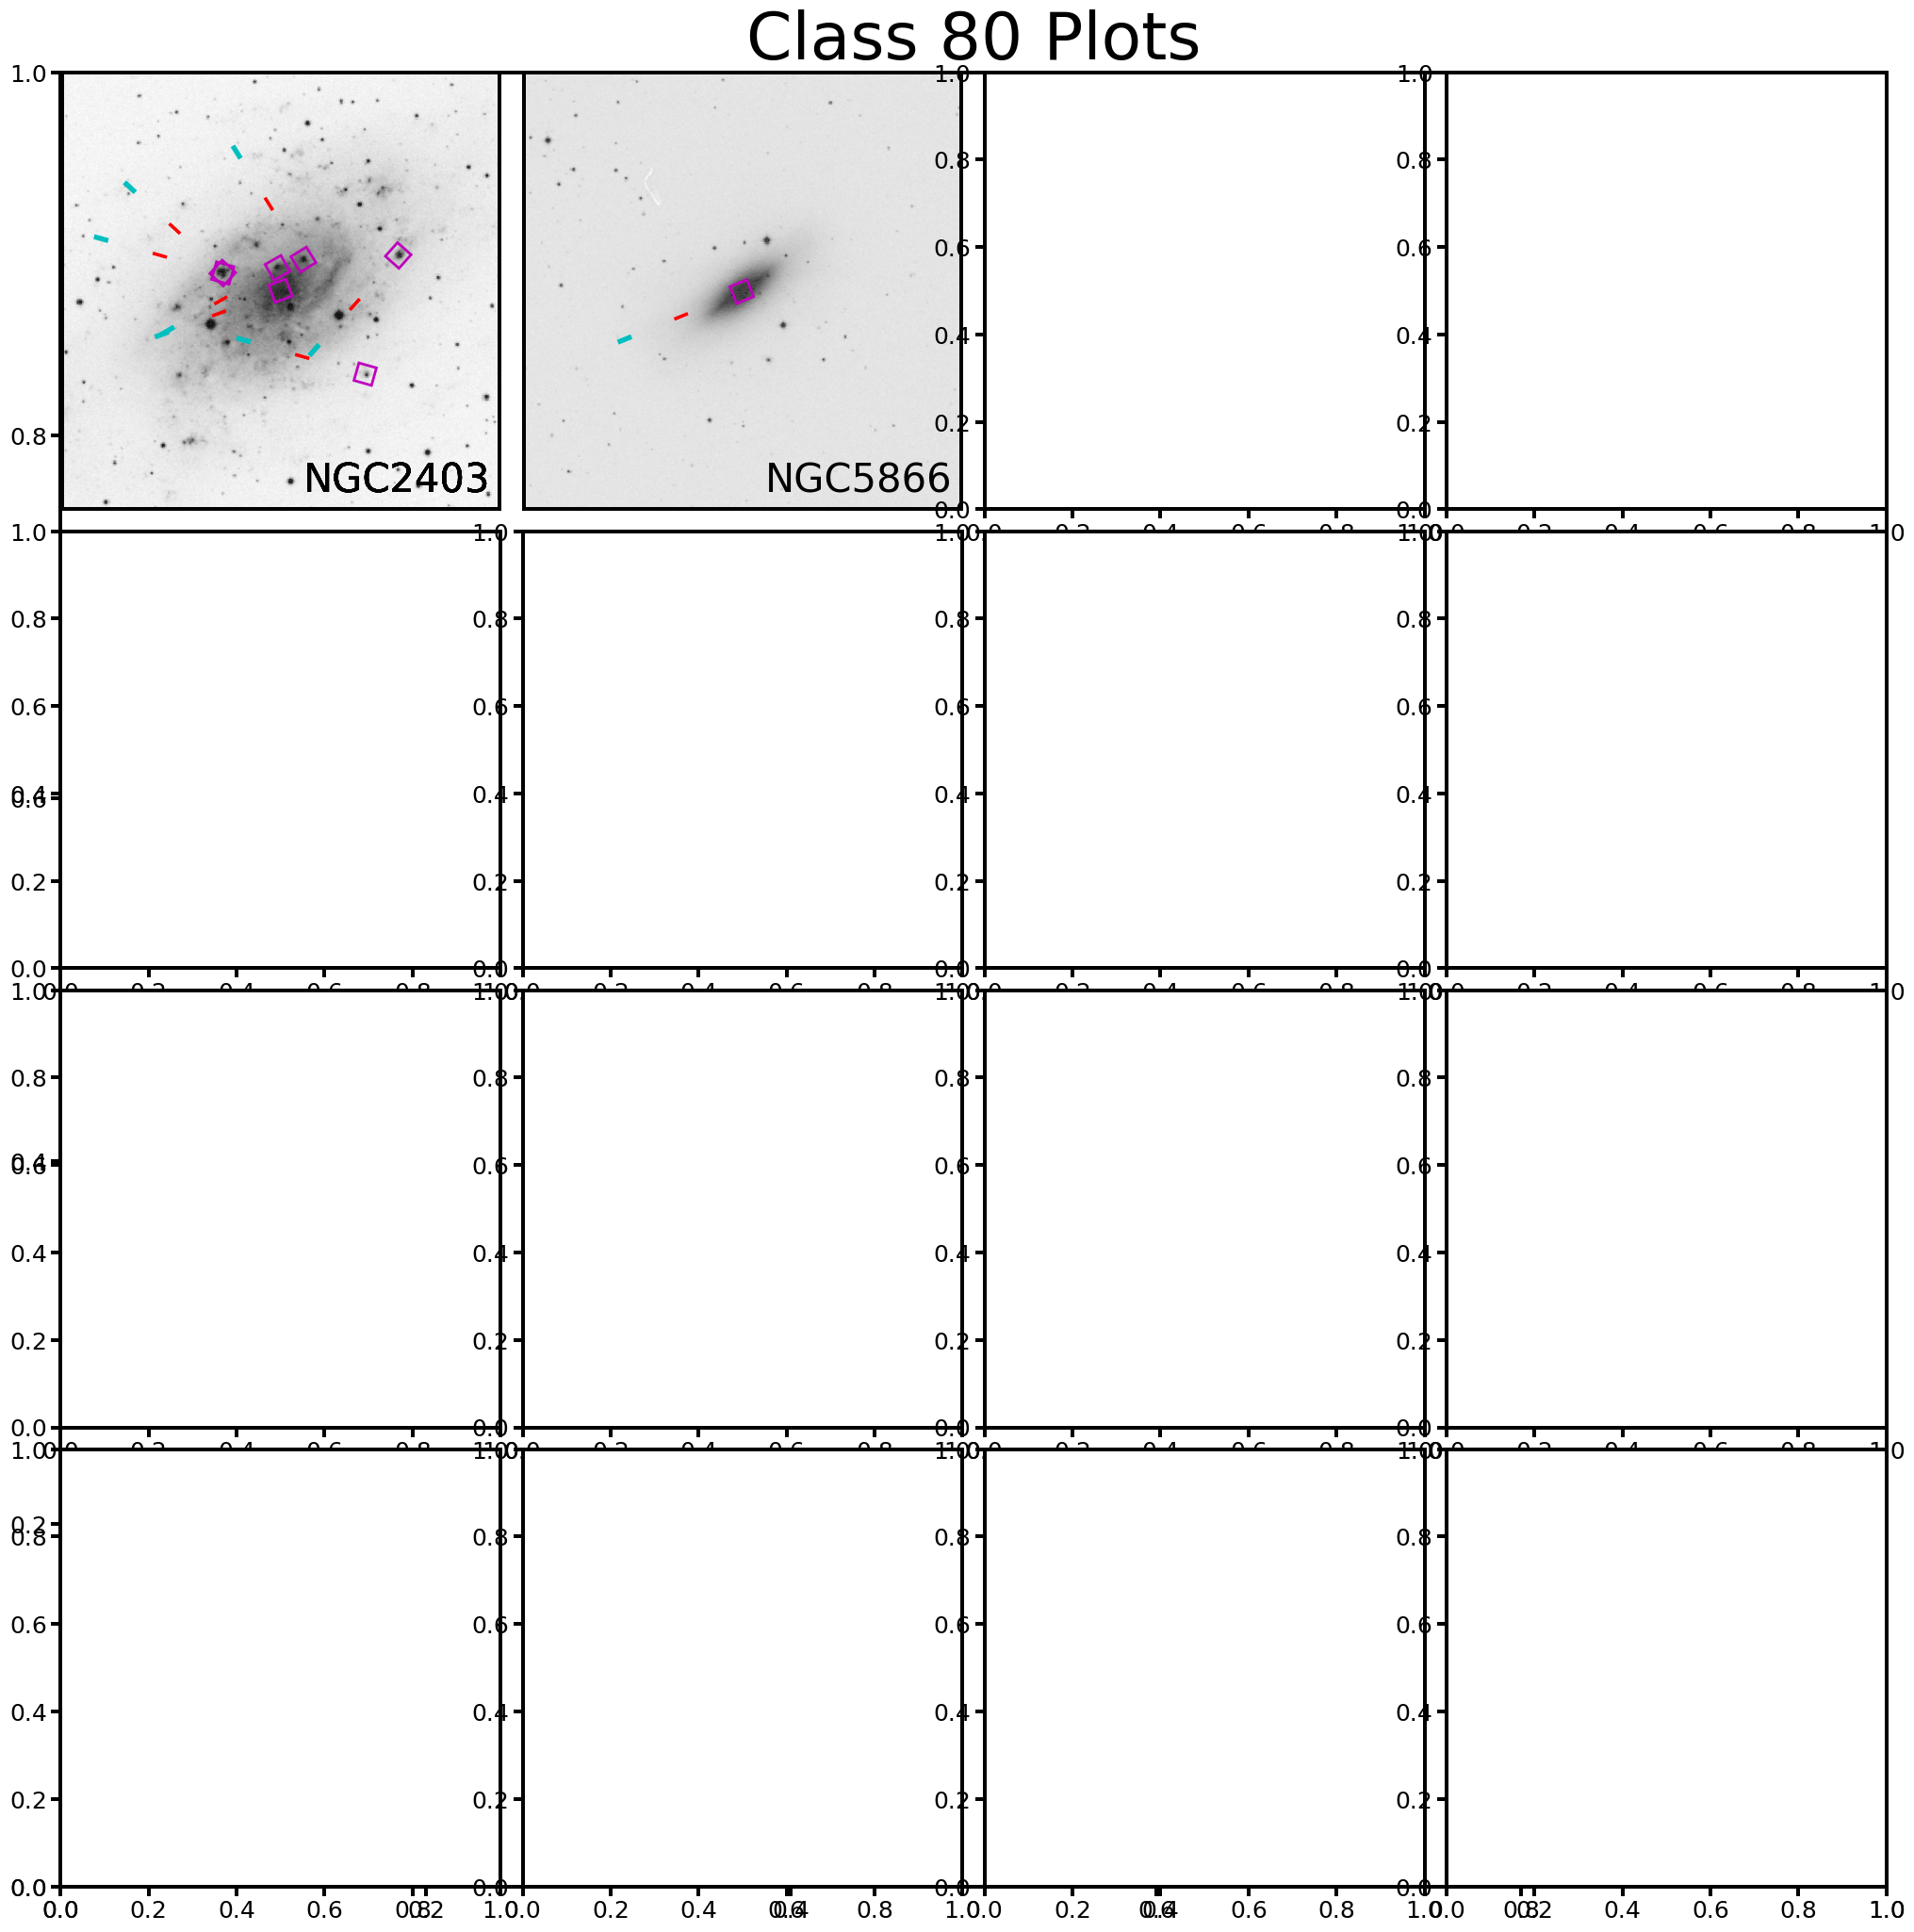

In [14]:
#Main Plotting Block


def p16(pg):
    set_rcparams_prop(amp=1.15)

    rr=1
    aa=6
    wrs=np.array([1.8, 0.2, 1.2, 0.05])
    hrs=np.array([1])
    fig = plt.figure(figsize=(20, 30))
    fig = plt.figure(figsize=(25, 25))
    plt.title("Class {} Plots".format(obn),fontdict={'fontsize': 50})
    ncol=4
    nrow=4
    gs1 = gridspec.GridSpec(nrow, ncol, figure=fig, 
    #                         width_ratios=wrs, height_ratios=hrs,
                            hspace=0.05, wspace=0.05
                           )
    pidxs=np.arange(ncol*nrow)
    axs=[]
    for i in range(len(pidxs)):
        ax=fig.add_subplot(gs1[i // ncol, i%ncol])
        axs.append(ax)


    cut_widths=np.array([
        240,240,240,240,
        240,240,240,240,
        240,240,240,240,
        240, 240,240,240,
    ])/3600*3 



  

    fidx = np.zeros(len(obs_tables))
    
    
    minsep=0.5
    file_sc=SkyCoord(fdf.ra, fdf.dec, frame='icrs', unit='deg')    
    

    for i in range(0,16,1):
        

        ax=axs[i]
        j5 = i + 16*pg
        
        try:
            objname=objnames[idex[j5]]
        except:
            break
        print(objname, f"Index  {idex[j5]}")
        sdf=df.loc[df['objname']==objname,:]
        sdf.index=np.arange(len(sdf))
        ra0, dec0=sdf.loc[0,'ra'], sdf.loc[0,'dec']
    #     print(ra0, dec0)
        c = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        cond=np.array(file_sc.separation(c))<minsep
        match_df=fdf[cond]
        match_df.index=np.arange(np.sum(cond))
        
        if computer ==1:
            fits_file=match_df.loc[fidx[idex[j5]],'file_path'][0:48] + match_df.loc[fidx[idex[j5]],'file_path'][64:] #61forblue,60forred
            fits_file=match_df.loc[fidx[idex[j5]],'file_path'][0:44] + match_df.loc[fidx[idex[j5]],'file_path'][64:] #Skyview
       
        print(fidx[i])
        print('number of matched DF', len(match_df))
        hdu=fits.open(os.path.normpath(fits_file))
        hdr=hdu[0].header
        oiwcs=astropy.wcs.WCS(header=hdr) 
        if i == 1:
            oitest = oiwcs
        print(fits_file)
        cmap=cm.gray_r
        origin='lower'

        oim=hdu[0].data
        
        #Calculate offset between ra0 and owics, cc and cutout
        sky = oiwcs.pixel_to_world(500, 500)
        dra = sky.ra-c.ra; ddec =  sky.dec - c.dec  ;
        raoff = dra.deg/cut_widths[1]; decoff = ddec.deg/cut_widths[1];

        print(raoff,decoff, "Offsets")
        
        

        ra0, dec0=sdf.loc[0,'ra']+cut_widths[i]*raoff, sdf.loc[0,'dec']+cut_widths[i]*decoff
        
        print(ra0, dec0 , "1Coord")
        
        cc = SkyCoord(ra0, dec0, frame='icrs', unit='deg')

        print(oiwcs,cc)
        print('npt',len(sdf))
        img_cutout_obj=Cutout2D(oim, cc, 
                           u.Quantity(cut_widths[i], unit='deg'),
                           wcs=oiwcs,
                        mode='trim',
    #                     mode='partial',
                       )

        im=img_cutout_obj.data
        iwcs=img_cutout_obj.wcs


        img=ax.matshow(im, 
                   cmap=cmap, 
                   origin=origin, interpolation='none', 
    #                zorder=1,
    #               alpha=alpha, zorder=zorder, aspect=aspect, 
    #                norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
                      )
    #     print(objname)


        for j in range(len(sdf)):
            jra, jdec=sdf.loc[j,'ra'], sdf.loc[j,'dec']        
            c_obj=SkyCoord(jra, jdec, 
                                              unit='deg',
                                              frame='icrs')
            if sdf.loc[j,'aperture']=='MDRS':
                sep=u.Quantity(-90.18-118.07, unit='arcsec')
                c_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
                print('MDRS!!!')

            sep=u.Quantity(90.18+118.07, unit='arcsec')
            m_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
            sep=u.Quantity(-10.27+118.07, unit='arcsec')
            h_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)

            objs=[c_obj, m_obj, h_obj]
            xws=[30,4,1.25]
            yws=[30,20,20]
            clrs=['m','c','r']

            for k in range(3):
                pcent_x, pcent_y=iwcs.world_to_pixel(objs[k])
                psm=iwcs.pixel_scale_matrix
                pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
        #         print('pscale',pscale)
                pxwidth=xws[k]/3600/pscale
                pywidth=yws[k]/3600/pscale
    #             edgecolor='m'
                edgecolor=clrs[k]
        #         edgecolor='k'
                sqlw=2


                rot_ang=0
                rot_ang=sdf.loc[j,'pa']
                recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
                rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
                                                 angle=rot_ang,
                                                 zorder=20,
            #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
            #                                      angle=(-180),
            #                                   facecolor='w', fill=True)
                                        linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
                #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
                art=ax.add_artist(rec)
            ax.text(0.98,0.02,objname,
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax.transAxes,
                    size=30
                   )
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')

    #         pcent_x, pcent_y=iwcs.world_to_pixel(m_obj)
    #         psm=iwcs.pixel_scale_matrix
    #         pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
    # #         print('pscale',pscale)
    #         pxwidth=4/3600/pscale
    #         pywidth=20/3600/pscale
    #         edgecolor='c'
    # #         edgecolor='k'
    #         sqlw=3


    #         rot_ang=0
    #         rot_ang=sdf.loc[j,'pa']
    #         recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
    #         rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
    #                                          angle=rot_ang,
    #                                          zorder=20,
    #     #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
    #     #                                      angle=(-180),
    #     #                                   facecolor='w', fill=True)
    #                                 linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
    #         #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
    #         art=ax.add_artist(rec)

    csp=0.0
    fig.subplots_adjust(wspace=csp, hspace=csp)

    # aa=cc.separation(c)
    # np.array(Angle(aa, unit=u.deg))<0.5
    match_df

    hdu.close()


    
    #fig.savefig(fname,dpi=256, bbox_inches='tight')
    return(fig)

s4 = maindir + "/tbls/Classes.txt"

ntbl = pd.read_table(s4, header = None)

name = ntbl[0][obn].split()[1:]
name = " ".join(name)
name

p = f"{obn}{name}Trim.pdf"

with PdfPages(p) as pdf:
    for j in range(0, math.ceil(len(idex)/16 )):
        print(j)
        fig = p16(0+j)
        pdf.savefig(fig)
    
    
 



In [ ]:
idex = []
for j2 in range(len(objnames)):
    if ipd[0][j2] == 1:
        idex.append(j2)
        
idex

In [ ]:
cut_widths[1]

t =  SkyCoord(314.027375, 31.93488889, unit = 'deg')


p

In [ ]:
cut_widths=np.array([
        240,240,240,240,
        240,240,240,240,
        240,240,240,240,
        240, 240,240,240,
    ])/3600*3 

0.4034109999999984/cut_widths[1]

In [ ]:
14 + 40 + 4 + 2

In [ ]:
41.2693 - 40.865889

In [ ]:
s4 = maindir + "/tbls/Classes.txt"

ntbl = pd.read_table(s4, header = None)

name = ntbl[0][obn].split()[1:]
name = " ".join(name)
p = f"{obn}{name}.pdf"

p


In [ ]:
t9 = range(0,320,16)
t9[8]